Air Quality in Catalonia challenge is asking participants to use the data from the Catalan Transparency Portal to analyze the evolution of air pollution in Catalonia over the past three decades and develop algorithms to predict air pollutant concentrations. Participants will be asked to do a global analysis of air quality, build algorithms to predict air pollutant concentrations, and write a final report with their approach, results, conclusions, and recommendations

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 25)
plt.rcParams["figure.figsize"] = [10, 6]
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("9c820e0e5b3a4264aa5058f24a82386d.csv")
df

,CODI EOI,NOM ESTACIO,DATA,MAGNITUD,CONTAMINANT,UNITATS,TIPUS ESTACIO,AREA URBANA,CODI INE,MUNICIPI,CODI COMARCA,NOM COMARCA,...,17h,18h,19h,20h,21h,22h,23h,24h,ALTITUD,LATITUD,LONGITUD,GEOREFERENCIA
0,43148003,Tarragona (Bonavista),25/01/2023,10,PM10,µg/m3,industrial,suburban,43148,Tarragona,36,Tarragonès,...,18.0,24.0,28.0,29.0,39.0,33.0,24.0,20.0,39,41.115910,1.191999,POINT (1.1919986 41.11591)
1,8137001,Montseny (La Castanya),25/01/2023,12,NOX,µg/m3,background,rural,8137,Montseny,41,Vallès Oriental,...,14.0,9.0,4.0,3.0,3.0,3.0,2.0,2.0,693,41.779280,2.358002,POINT (2.358002 41.77928)
2,8124009,Mollet del Vallès,25/01/2023,7,NO,µg/m3,traffic,suburban,8124,Mollet del Vallès,41,Vallès Oriental,...,9.0,26.0,17.0,7.0,16.0,62.0,62.0,58.0,90,41.549183,2.212098,POINT (2.2120984 41.549183)
3,8114006,Martorell,25/01/2023,7,NO,µg/m3,background,suburban,8114,Martorell,11,Baix Llobregat,...,5.0,2.0,2.0,4.0,7.0,7.0,3.0,1.0,78,41.475384,1.921202,POINT (1.9212021 41.475384)
4,8112003,Manlleu,25/01/2023,8,NO2,µg/m3,background,suburban,8112,Manlleu,24,Osona,...,21.0,22.0,22.0,35.0,38.0,36.0,32.0,28.0,460,42.003307,2.287299,POINT (2.2872992 42.003307)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106369,8125002,Montcada i Reixac,01/01/1991,14,O3,µg/m3,traffic,suburban,8125,Montcada i Reixac,40,Vallès Occidental,...,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,34,41.481972,2.188298,POINT (2.188298 41.481972)
3106370,8019004,Barcelona (Poblenou),01/01/1991,1,SO2,µg/m3,background,urban,8019,Barcelona,13,Barcelonès,...,13.0,13.0,20.0,15.0,16.0,16.0,19.0,16.0,3,41.403878,2.204501,POINT (2.204501 41.403878)
3106371,8101001,L'Hospitalet de Llobregat,01/01/1991,6,CO,mg/m3,background,urban,8101,"Hospitalet de Llobregat, l'",13,Barcelonès,...,0.6,1.0,1.9,1.5,1.6,1.6,1.1,1.0,29,41.370475,2.114999,POINT (2.114999 41.370475)
3106372,8125002,Montcada i Reixac,01/01/1991,7,NO,µg/m3,traffic,suburban,8125,Montcada i Reixac,40,Vallès Occidental,...,9.0,15.0,71.0,157.0,167.0,204.0,136.0,74.0,34,41.481972,2.188298,POINT (2.188298 41.481972)


In [3]:
cols = ['01h', '02h', '03h', '04h', '05h', '06h', '07h', '08h',
       '09h', '10h', '11h', '12h', '13h', '14h', '15h', '16h', '17h', '18h',
       '19h', '20h', '21h', '22h', '23h', '24h']

In [4]:
df.DATA = pd.to_datetime(df.DATA, format="%d/%m/%Y")

In [5]:
df['year'] = df.DATA.dt.year
df['month'] = df.DATA.dt.month
df['day'] = df.DATA.dt.day

In [6]:
df['sum_day'] = df[cols].sum(axis=1)

polutant_dummies = pd.get_dummies(df.MAGNITUD)
df = pd.concat([df, polutant_dummies], axis=1)

In [7]:
df['CODI EOI'].value_counts()

8102005     75800
43047001    73536
43123005    72855
43148003    72287
43171001    70140
            ...  
8297001      2227
8301002      1594
8221004      1357
8019056      1343
8169007        26
Name: CODI EOI, Length: 124, dtype: int64

In [8]:
df['MAGNITUD'].value_counts()

8      547242
7      546531
14     486801
1      452854
12     273300
6      266753
10     170283
65     147623
42      65304
3       57239
44      49797
30      16032
9       11424
11       6872
331      3577
53       3014
58       1728
Name: MAGNITUD, dtype: int64

In [11]:
pollutantsIds = df['MAGNITUD'].unique()
pollutantsIds

array([ 10,  12,   7,   8,   1,   6,  14,  65,  30,   9, 331,  11,  53,
        42,  44,   3,  58])

In [12]:
df_monthly = df.groupby(['month', 'year', "MAGNITUD"])['sum_day'].agg(['mean', "median", "count"])

In [13]:
df_monthly

mean   median  count
month year MAGNITUD                             
1     1991 1          416.633218   336.00    289
           3         2640.886364  2179.50     88
           6           41.639091    33.65    110
           7         1602.384146  1391.00    164
           8          955.169697   933.00    165
...                          ...      ...    ...
12    2022 12        1049.208669   885.00   1984
           14         648.776169   559.00   1519
           30          22.810968    18.40    155
           65          38.422849    34.15    372
           331        236.893548   228.00     31

[4016 rows x 3 columns]

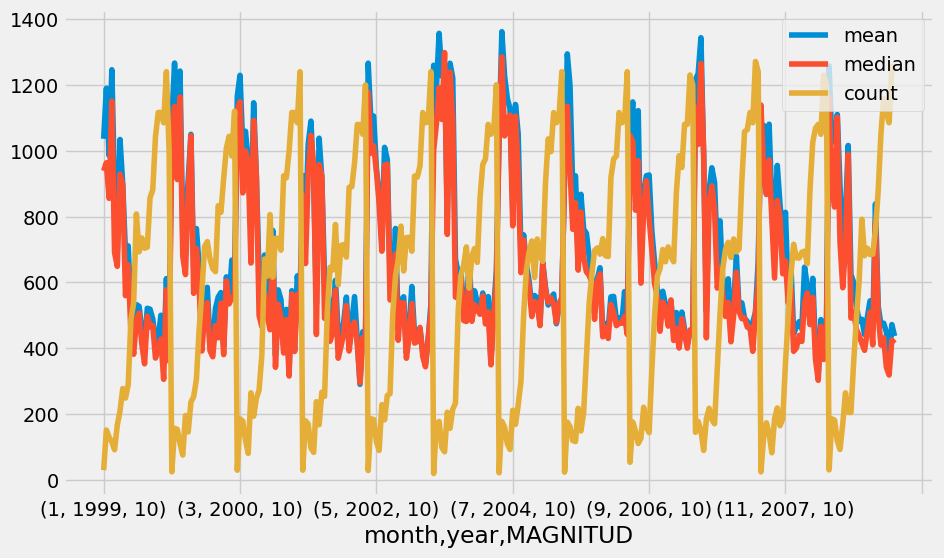

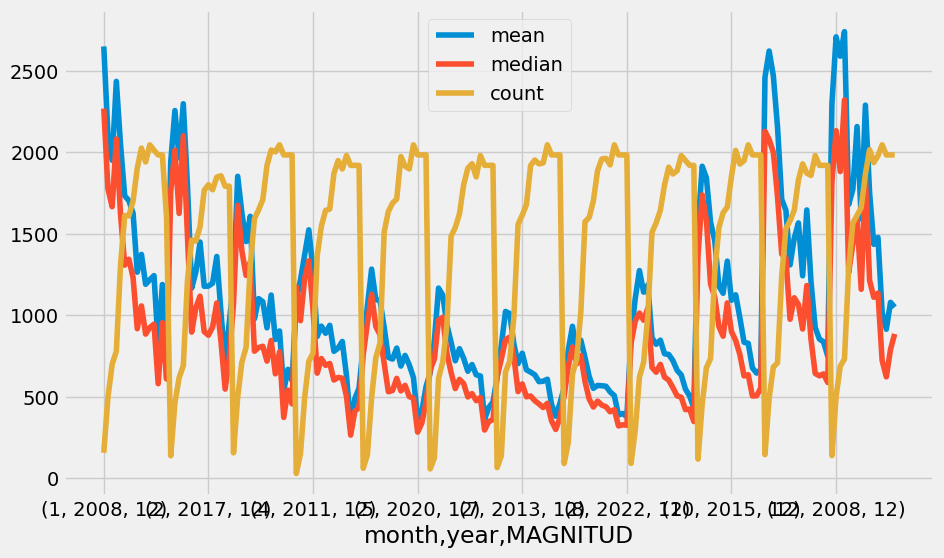

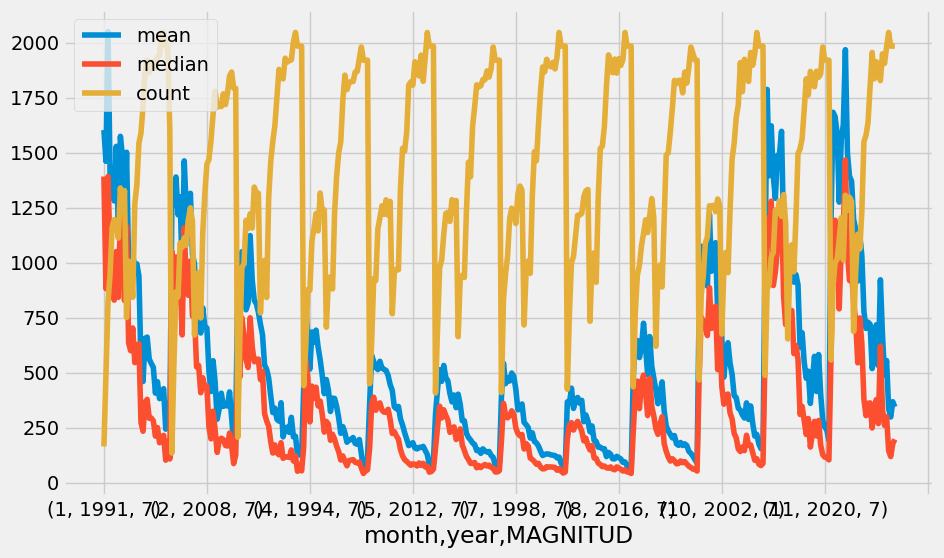

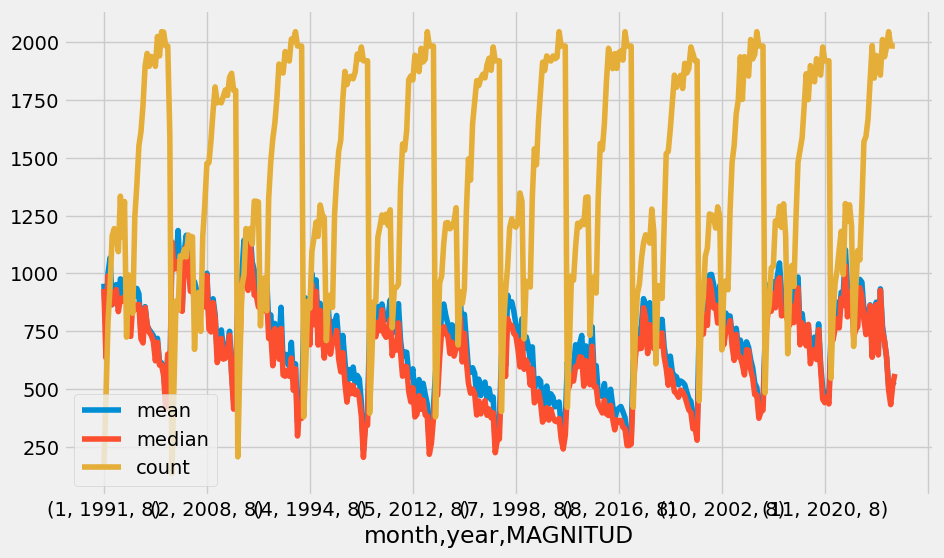

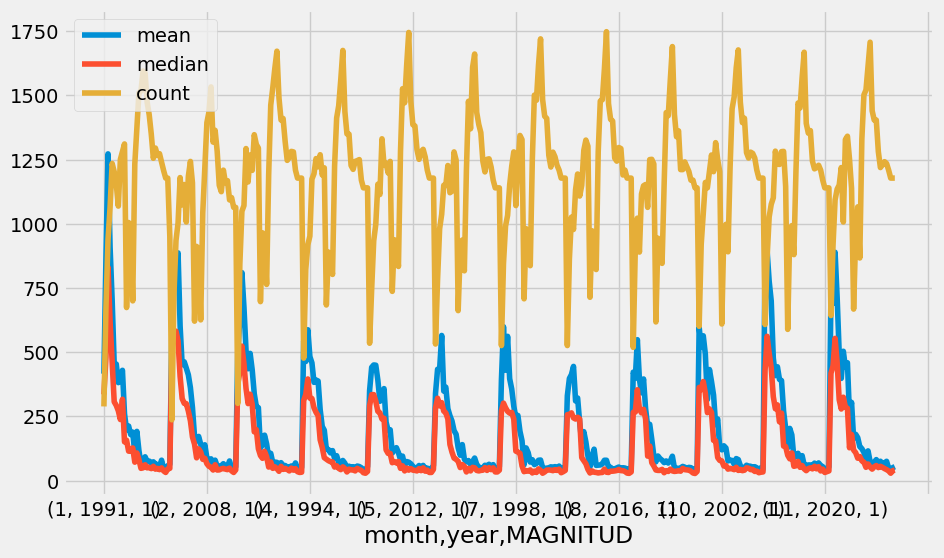

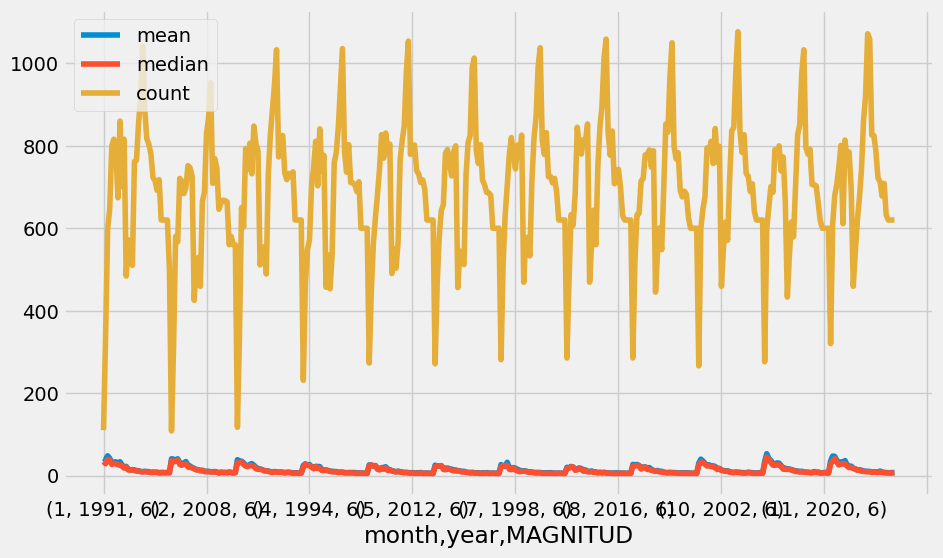

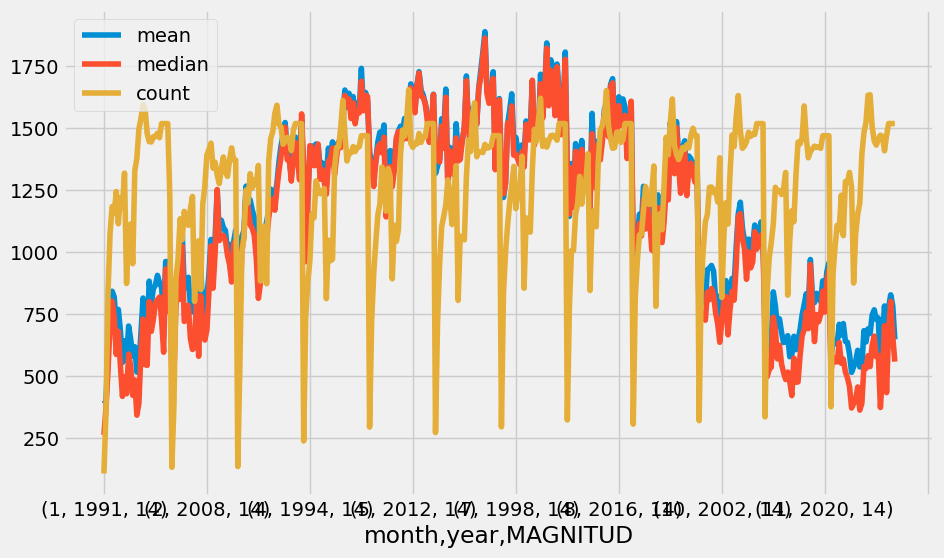

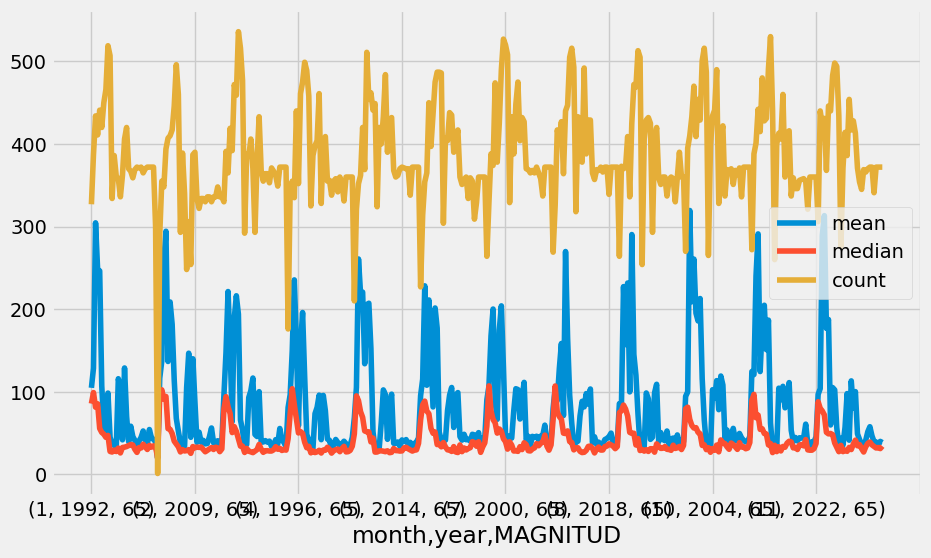

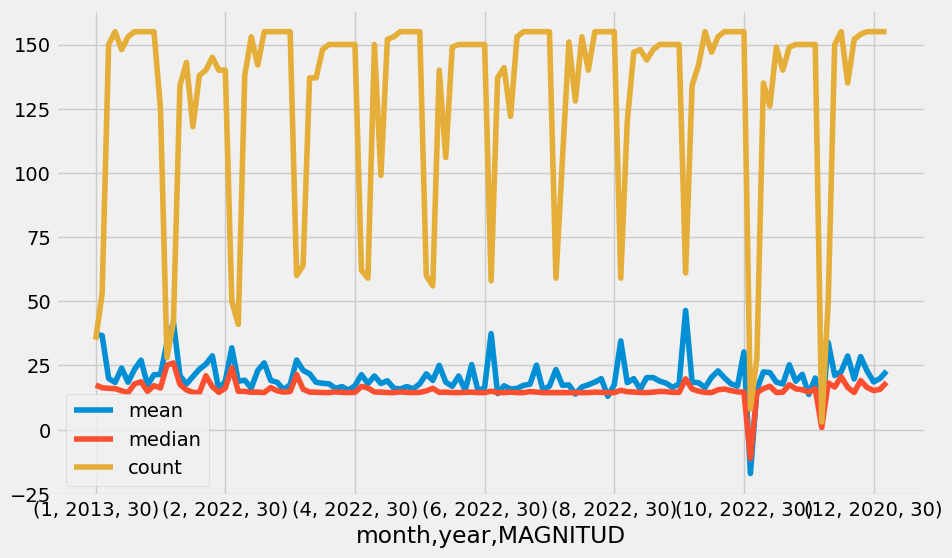

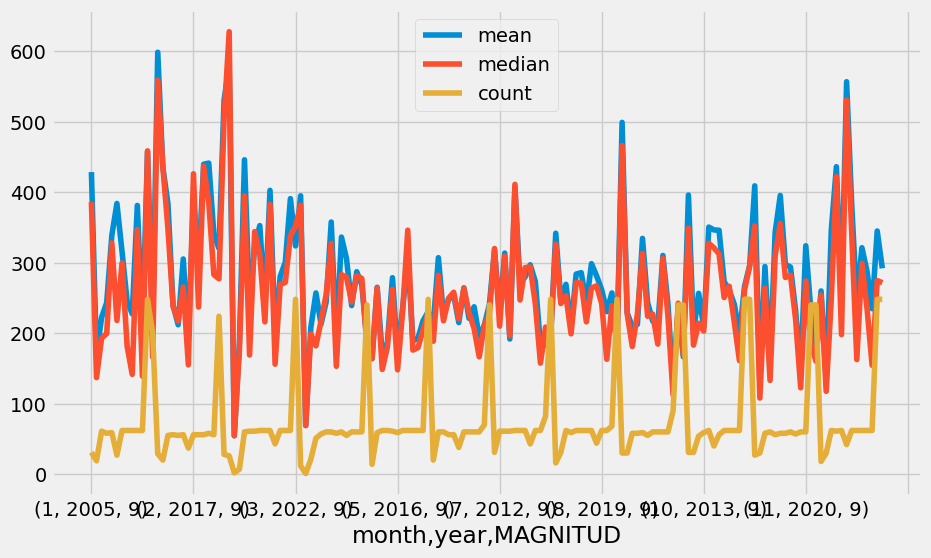

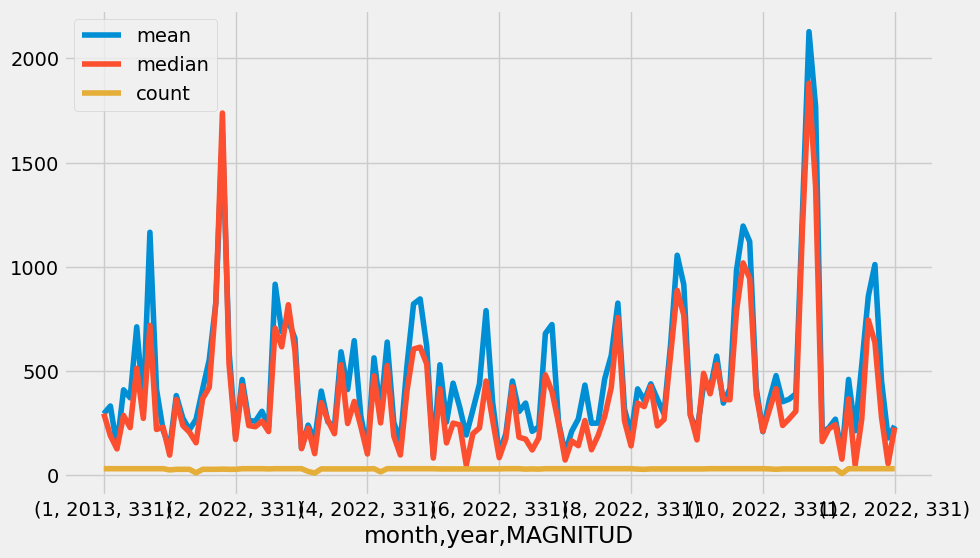

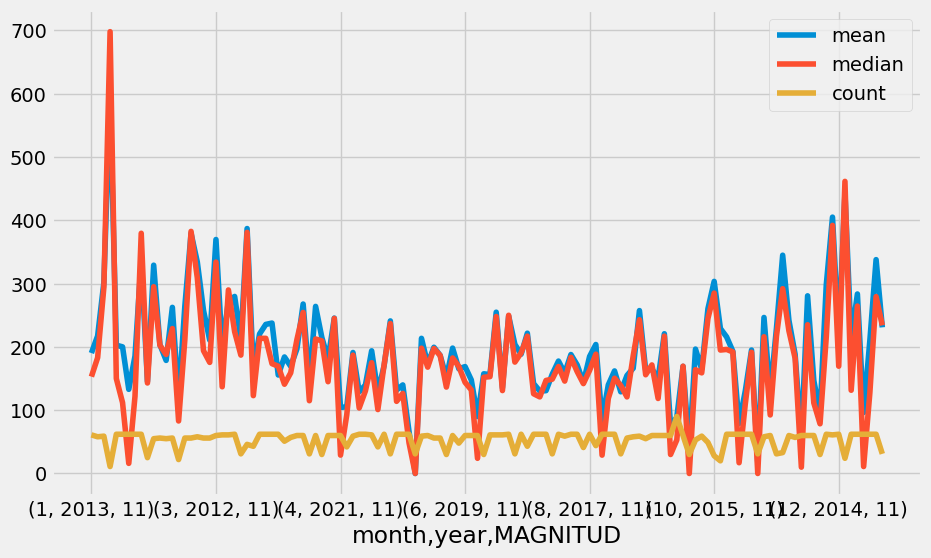

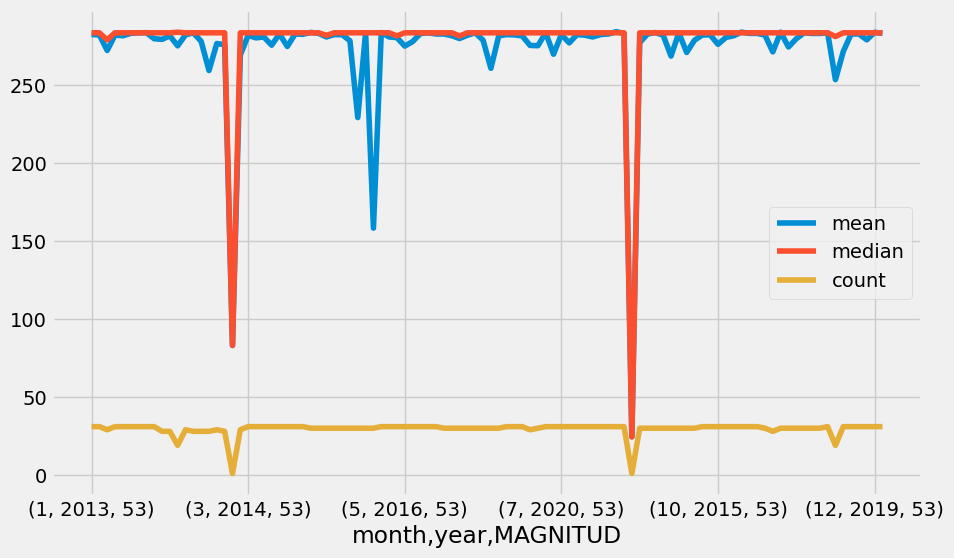

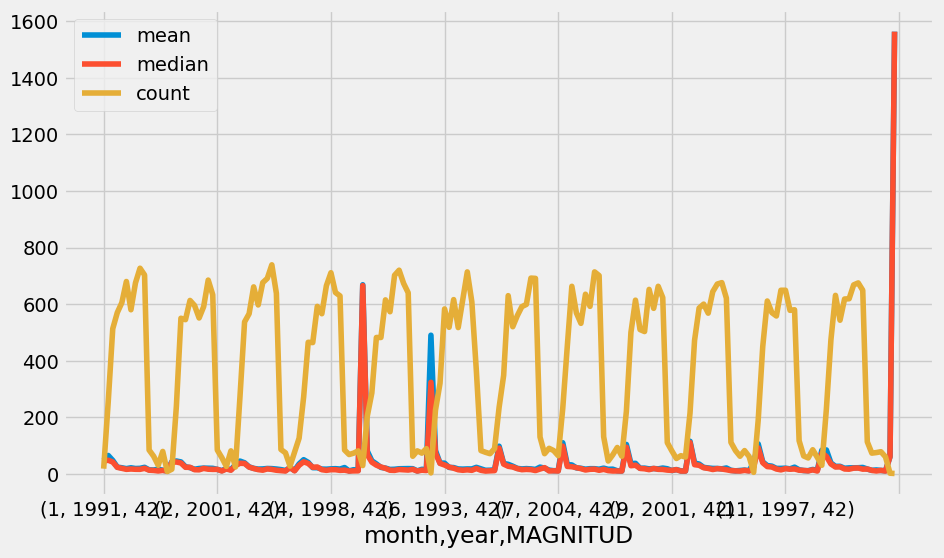

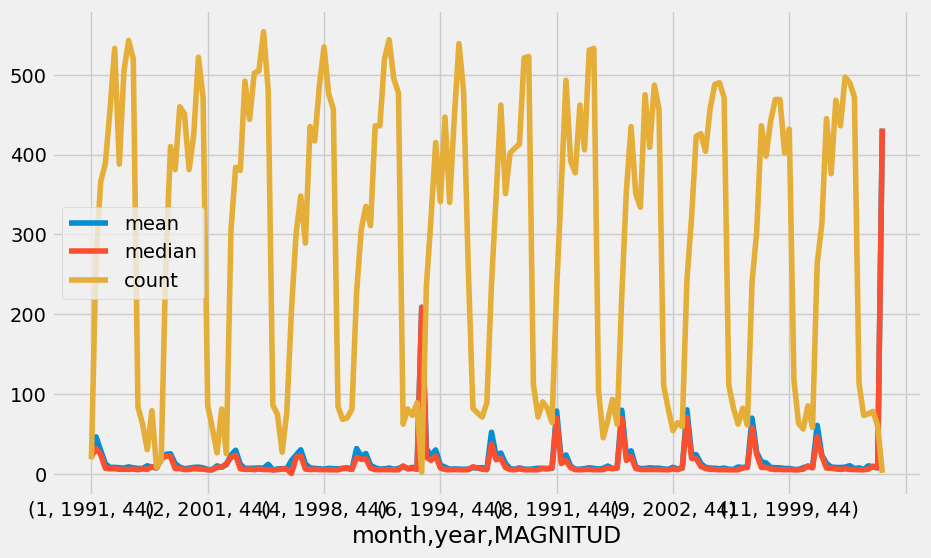

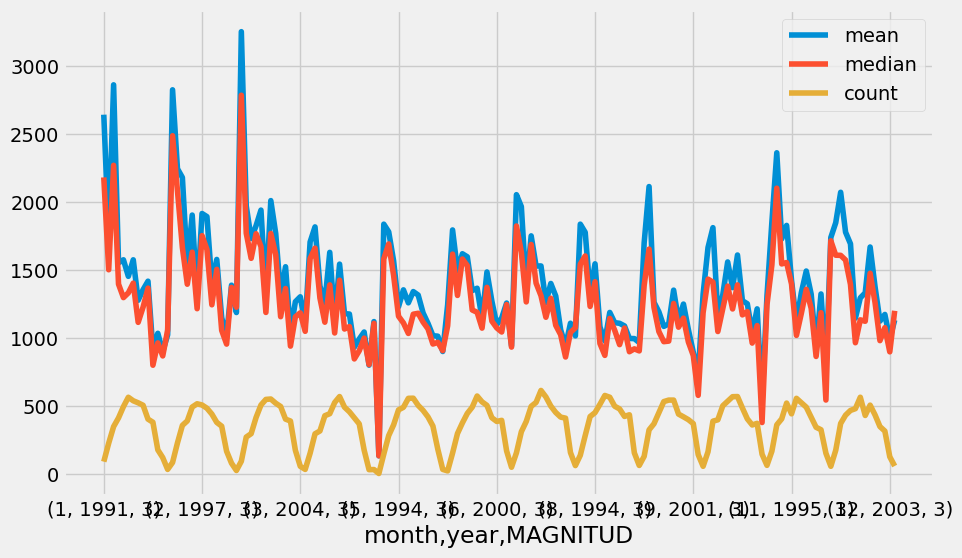

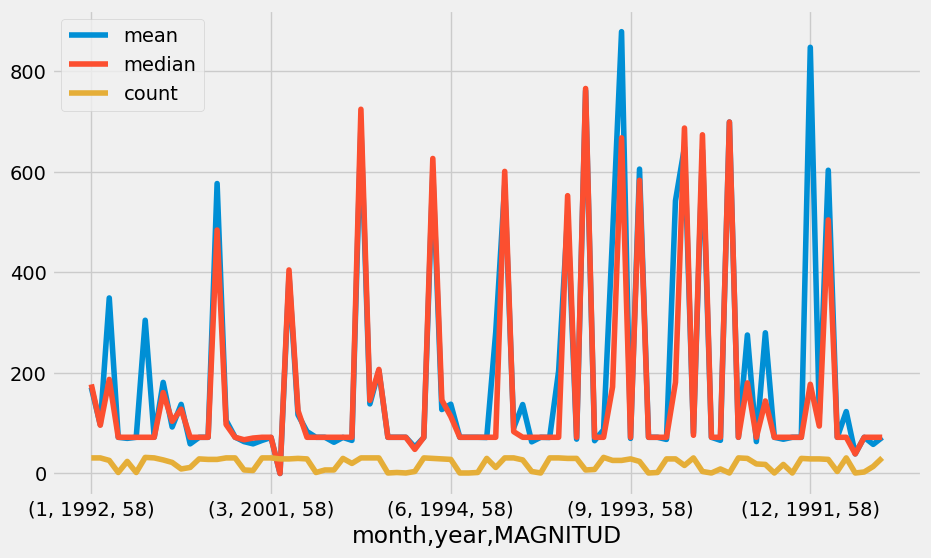

In [14]:
for x in pollutantsIds:
    #print(df_monthly.loc[(df_monthly.index.get_level_values('MAGNITUD') == x)].sort_values(by=['mean', "median"]))
    df_monthly.loc[(df_monthly.index.get_level_values('MAGNITUD') == x)].plot()

In [15]:
df_hourly = df.groupby(["MAGNITUD"])[cols].agg(['mean', "median", "count"])
df_hourly_median = df.groupby(["MAGNITUD"])[cols].agg(["median"])

In [16]:
df_hourly_median

,01h,02h,03h,04h,05h,06h,07h,08h,09h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median
MAGNITUD,,,,,,,,,,,,,,,,,,,,,,,,
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,45.0,41.0,38.0,36.0,35.0,36.0,40.0,46.0,57.0,60.0,56.0,53.0,52.0,51.0,50.0,49.0,50.0,53.0,57.0,59.0,60.0,59.0,56.0,50.0
6,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.5,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4
7,3.0,2.0,2.0,2.0,2.0,3.0,6.0,11.0,15.0,12.0,9.0,7.0,6.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
8,23.0,21.0,18.0,17.0,16.0,19.0,24.0,31.0,33.0,30.0,26.0,22.0,19.0,17.0,15.0,14.0,15.0,18.0,22.0,26.0,29.0,30.0,29.0,26.0
9,11.0,11.0,11.0,10.0,10.0,10.0,10.0,11.0,12.0,11.0,10.0,9.0,8.0,8.0,8.0,7.0,8.0,8.0,9.0,10.0,10.0,11.0,12.0,12.0
10,19.0,18.0,17.0,16.0,15.0,15.0,17.0,19.0,23.0,24.0,23.0,22.0,21.0,20.0,19.0,19.0,19.0,21.0,22.0,23.0,23.0,23.0,22.0,20.0
11,9.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,7.0,8.0,8.0,9.0


<AxesSubplot: >

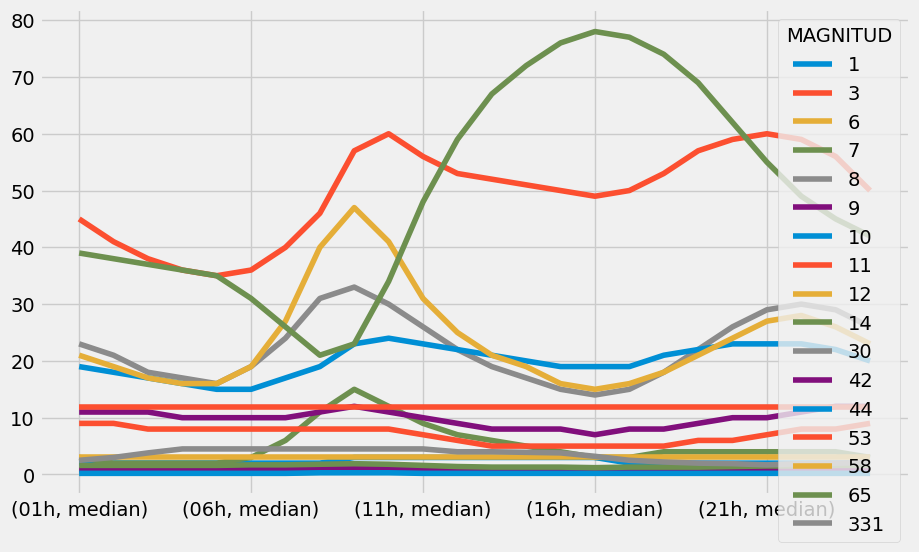

In [17]:
df_hourly_median.T.plot()

In [18]:
corr = df.corr()
corr["ALTITUD"].sort_values()

/tmp/ipykernel_669191/1270252458.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


LONGITUD       -0.104412
CODI COMARCA   -0.070486
09h            -0.067970
65             -0.065791
08h            -0.060106
MAGNITUD       -0.052438
10h            -0.049168
CODI EOI       -0.043374
CODI INE       -0.043374
3              -0.035921
30             -0.035770
44             -0.033091
42             -0.028931
6              -0.028159
07h            -0.024233
11             -0.023837
1              -0.021489
9              -0.019179
23h            -0.016602
22h            -0.014888
11h            -0.013039
331            -0.010567
58             -0.010439
24h            -0.009751
53             -0.009676
21h            -0.004768
7              -0.003579
12             -0.003321
8              -0.003199
01h            -0.002495
month          -0.000258
day             0.000256
sum_day         0.005850
02h             0.006570
20h             0.009954
06h             0.010558
03h             0.017351
12h             0.021584
04h             0.024476
05h             0.027573


<AxesSubplot: >

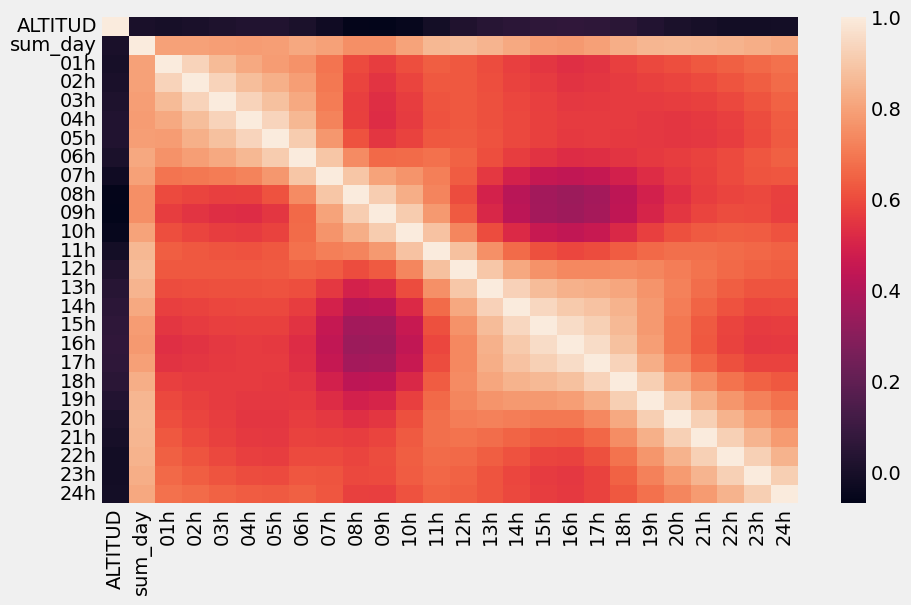

In [19]:
corr = df[["ALTITUD", "sum_day"] + cols].corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot: xlabel='AREA URBANA'>

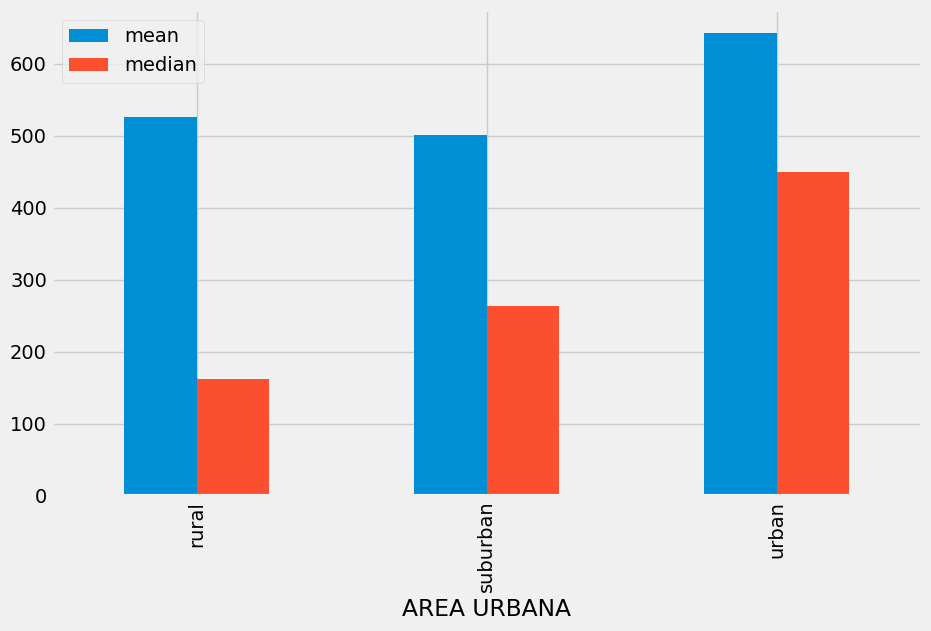

In [20]:
df.groupby(['AREA URBANA'])["sum_day"].agg(['mean', "median"]).plot(kind="bar")

<AxesSubplot: xlabel='NOM COMARCA'>

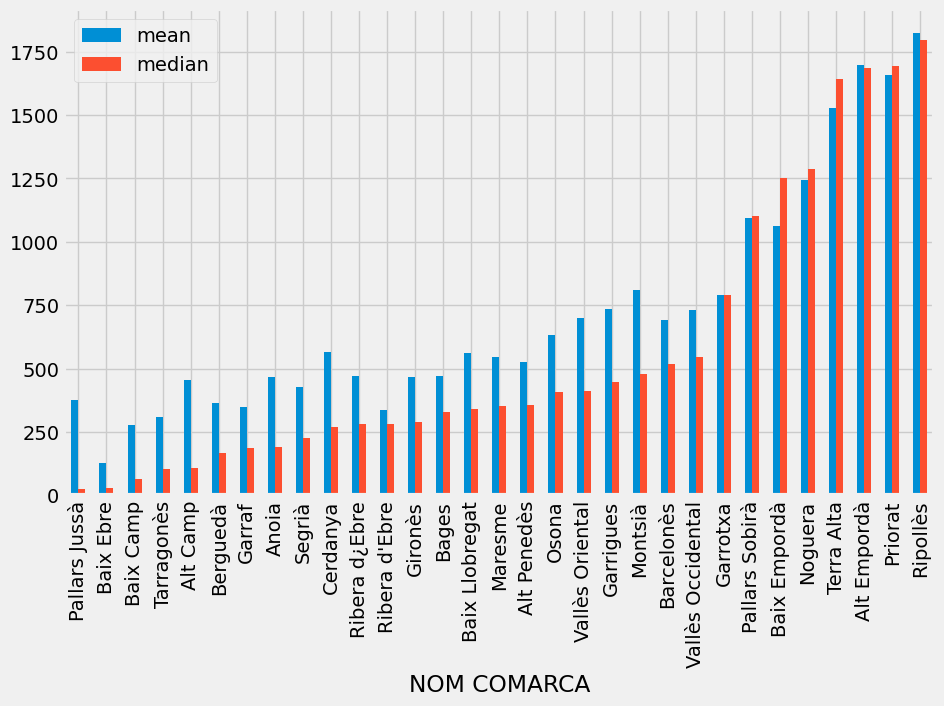

In [21]:
df.groupby(['NOM COMARCA'])["sum_day"].agg(['mean', "median"]).sort_values(by='median').plot(kind="bar")

In [22]:
df.groupby(['NOM COMARCA', "MAGNITUD" ])["sum_day"].agg(['mean', "median"]).sort_values(by='mean')

,,mean,median
NOM COMARCA,MAGNITUD,,
Pallars Jussà,6,3.013423,2.4
Baix Ebre,6,5.308080,4.8
Alt Camp,6,5.977174,5.4
Segrià,44,6.477778,5.2
Bages,44,6.626375,5.7
...,...,...,...
Ripollès,14,1825.318131,1797.0
Baix Empordà,14,1895.151279,1880.0
Pallars Jussà,14,2136.343627,2123.0
